# Introduction

Compare the different ways to determine the noise color from the power spectral density.

## Standard imports

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

import time
np.random.seed(int(time.time()))

## Specific imports

In [12]:
from generate_timeseries import Timeseries
from noise_parameters import NOISE
from noise_properties_plotting import example_noise_fit

## Settings figures

In [10]:
from elife_settings import set_elife_settings, ELIFE

set_elife_settings()

# Compare fits for noise color determination

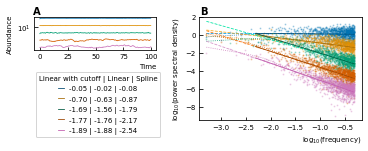

In [15]:
N = 50
    
steadystate = np.logspace(-2,2,50)[::-1]

params = {}

# no immigration
params['immigration_rate'] = np.zeros([N, 1])

omega = np.random.normal(0,0.1,[N, N]); # np.zeros([N,N]);
np.fill_diagonal(omega, -1)
params['interaction_matrix'] = omega

# growthrates determined by the steady state
g = - omega.dot(steadystate).reshape([N,1])
params['growth_rate'] = g

initcond = np.array([np.random.normal(abundance, 0.1*abundance) 
                     for abundance in steadystate]).reshape([N,1])

params['initial_condition'] = initcond
params['noise_linear'] = 1e-1

x = Timeseries(params, noise_implementation = NOISE.LANGEVIN_LINEAR,
                    dt=0.01, tskip=4, T=100.0).timeseries

fig = plt.figure(figsize=(ELIFE.TEXTWIDTH,2))

gs = gridspec.GridSpec(2,2,wspace=0.3, hspace=0.5, top=0.9, right=0.95, bottom=0.18,
                       width_ratios=[0.75,1], height_ratios=[1,1.5])
ax_ts = fig.add_subplot(gs[0])
ax_pws = fig.add_subplot(gs[:,1])
ax_leg = fig.add_subplot(gs[2])
ax_leg.axis('off')
ax_left = fig.add_subplot(gs[:,0])
ax_left.axis('off')
ax_left.text(0.05, 1.1, 'A', transform=ax_left.transAxes, fontsize=10, fontweight='bold', 
                  va='top', ha='right')
ax_pws.text(0.05, 1.1, 'B', transform=ax_pws.transAxes, fontsize=10, fontweight='bold', 
                  va='top', ha='right')

ax_ts.set_yscale('log')
ax_ts.set_ylabel('Abundance')
ax_ts.set_xlabel('Time', ha='right', x=1)


for j in range(1, N+1, int(N/5)):
    ax_ts.plot(x['time'][::10], x['species_%d'%j][::10])

    example_noise_fit(ax_pws, x['species_%d'%j], spline=True, linear_all=True)

ax_pws.set_xlabel('log$_{10}$(frequency)', ha='right', x=1)

handles, labels = ax_pws.get_legend_handles_labels()
ax_leg.legend(handles, labels, title='Linear with cutoff | Linear | Spline', loc=2)
plt.show()